### KWAKYE GEORGE
# Oil production prediction using Linear regression model

One of the most difficult tasks in the petroleum industry continues to be the forecasting of oil production. Oil production forecasting can be done in a variety of ways, with decline curve analysis being one. But for this project, I'll be forecasting oil production rates using linear regression, a supervised learning algorithm. The project's data comes from the volve field (well '15/9-F-12).



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline



import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the volve dataset
Volve_data = pd.read_excel('Volve production data.xlsx',sheet_name='Daily Production Data',)
pd.set_option('display.max_columns',None)


In [3]:
Volve_data['NPD_WELL_BORE_NAME'].unique()

array(['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D',
       '15/9-F-4', '15/9-F-5'], dtype=object)

In [4]:
Volve_data = Volve_data[Volve_data['NPD_WELL_BORE_NAME']=='15/9-F-12']

In [5]:
Volve_data.shape

(3056, 24)

In [6]:
#let's change the columns names 
list(Volve_data.columns)

['DATEPRD',
 'WELL_BORE_CODE',
 'NPD_WELL_BORE_CODE',
 'NPD_WELL_BORE_NAME',
 'NPD_FIELD_CODE',
 'NPD_FIELD_NAME',
 'NPD_FACILITY_CODE',
 'NPD_FACILITY_NAME',
 'ON_STREAM_HRS',
 'AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_DP_TUBING',
 'AVG_ANNULUS_PRESS',
 'AVG_CHOKE_SIZE_P',
 'AVG_CHOKE_UOM',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'BORE_OIL_VOL',
 'BORE_GAS_VOL',
 'BORE_WAT_VOL',
 'BORE_WI_VOL',
 'FLOW_KIND',
 'WELL_TYPE']

In [7]:
columns_names = {'DATEPRD':'Dates',
 'WELL_BORE_CODE':'well_id',
 'NPD_WELL_BORE_CODE':'well_name_code',
 'NPD_WELL_BORE_NAME':'well_name',
 'NPD_FIELD_CODE': 'field_code',
 'NPD_FIELD_NAME':'field_name',
 'NPD_FACILITY_CODE':'facility_code',
 'NPD_FACILITY_NAME':'facility_name',
 'ON_STREAM_HRS':'on_stream_hrs',
 'AVG_DOWNHOLE_PRESSURE':'bhp',
 'AVG_DOWNHOLE_TEMPERATURE':'bht',
 'AVG_DP_TUBING':'dp_tubing',
 'AVG_ANNULUS_PRESS':'casing_pressure',
 'AVG_CHOKE_SIZE_P':'choke_size',
 'AVG_CHOKE_UOM':'choke_units',
 'AVG_WHP_P':'tht',
 'AVG_WHT_P':'thp',
 'DP_CHOKE_SIZE':'choke size percentage',
 'BORE_OIL_VOL':'oil_vol',
 'BORE_GAS_VOL':'gas_vol',
 'BORE_WAT_VOL':'water_vol',
 'BORE_WI_VOL':'water_inj',
 'FLOW_KIND':'flow_kind',
 'WELL_TYPE':'well_type'
    
}

In [8]:
Volve_data =Volve_data.rename(columns=columns_names)
Volve_data.head(10)

#Volve_data.shape

,Dates,well_id,well_name_code,well_name,field_code,field_name,facility_code,facility_name,on_stream_hrs,bhp,bht,dp_tubing,casing_pressure,choke_size,choke_units,tht,thp,choke size percentage,oil_vol,gas_vol,water_vol,water_inj,flow_kind,well_type
1911,2008-02-12,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,MÆRSK INSPIRER,11.50,308.055940,104.418090,201.250000,18.639557,14.484431,%,106.805939,16.294718,92.475107,284.65,38888.67,385.01,NaN,production,OP
1912,2008-02-13,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,MÆRSK INSPIRER,24.00,303.033518,105.402696,182.144942,16.466641,22.832986,%,120.888576,53.374330,89.620148,1869.70,285246.16,7.13,NaN,production,OP
1913,2008-02-14,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,MÆRSK INSPIRER,22.50,295.586061,105.775486,181.867887,12.659589,31.249966,%,113.718175,72.737631,80.120465,3124.09,509954.88,1.16,NaN,production,OP
1914,2008-02-15,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,MÆRSK INSPIRER,23.15,297.662702,105.751875,180.832060,5.264052,28.518930,%,116.830642,69.995943,84.250990,2608.28,383426.67,0.97,NaN,production,OP
1915,2008-02-16,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,MÆRSK INSPIRER,24.00,295.935519,105.811114,180.501045,12.384634,30.227902,%,115.434474,71.518347,82.359026,3051.80,418474.00,4.89,NaN,production,OP
1916,2008-02-17,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,MÆRSK INSPIRER,24.00,295.551657,105.831299,180.345781,14.384565,29.974052,%,115.205876,73.641800,82.168501,2982.63,422763.00,1.85,NaN,production,OP
1917,2008-02-18,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,MÆRSK INSPIRER,23.00,294.211063,105.866467,180.929248,15.980444,30.308403,%,113.281815,74.160157,80.263045,2980.52,413831.00,6.48,NaN,production,OP
1918,2008-02-19,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,MÆRSK INSPIRER,24.00,293.829243,105.867958,180.060115,18.811254,30.486977,%,113.769128,74.901839,81.274949,3046.19,429218.00,0.73,NaN,production,OP
1919,2008-02-20,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,MÆRSK INSPIRER,24.00,293.061480,105.879330,179.661744,19.740757,29.907024,%,113.399737,73.039017,80.773921,3057.18,442982.75,0.46,NaN,production,OP
1920,2008-02-21,NO 15/9-F-12 H,5599,15/9-F-12,3420717,VOLVE,369304,MÆRSK INSPIRER,24.00,292.540247,105.883434,179.433895,19.431675,30.493011,%,113.106352,71.737488,79.975169,3030.33,423809.16,0.45,NaN,production,OP


From the outputs,the data is unstructured and contains all kinds of data types. Let's take a good look at the data by performing EDA

## Exploratory Data Analysis

In [9]:
Volve_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3056 entries, 1911 to 4966
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Dates                  3056 non-null   datetime64[ns]
 1   well_id                3056 non-null   object        
 2   well_name_code         3056 non-null   int64         
 3   well_name              3056 non-null   object        
 4   field_code             3056 non-null   int64         
 5   field_name             3056 non-null   object        
 6   facility_code          3056 non-null   int64         
 7   facility_name          3056 non-null   object        
 8   on_stream_hrs          3056 non-null   float64       
 9   bhp                    3050 non-null   float64       
 10  bht                    3050 non-null   float64       
 11  dp_tubing              3050 non-null   float64       
 12  casing_pressure        3043 non-null   float64       
 13  

The data contains variables of object, numeric and datetime types. The data also contains null values.

In [10]:
Volve_data.isnull().sum()

Dates                       0
well_id                     0
well_name_code              0
well_name                   0
field_code                  0
field_name                  0
facility_code               0
facility_name               0
on_stream_hrs               0
bhp                         6
bht                         6
dp_tubing                   6
casing_pressure            13
choke_size                 44
choke_units                 0
tht                         0
thp                         0
choke size percentage       0
oil_vol                     0
gas_vol                     0
water_vol                   0
water_inj                3056
flow_kind                   0
well_type                   0
dtype: int64

The output shows a large number of missing values for water inj. This is because the well is a producing well. We can verify by checking the type of wells in the data

In [11]:
Volve_data['well_type'].unique()

array(['OP'], dtype=object)

Next, we eliminate columns that contain categorical values. TheSe columns have no effect on the production data. We will eliminate the water injection column since there are no injection wells in the data.



In [12]:
column_to_drop =['well_id','well_name_code','field_code','field_name','facility_code','facility_name',
 'choke_units','flow_kind','water_inj','well_type','casing_pressure','well_name']

Volve_data = Volve_data.drop(column_to_drop,axis=1)

In [13]:
Volve_data.shape

(3056, 12)

In [14]:
Volve_data.describe()

,on_stream_hrs,bhp,bht,dp_tubing,choke_size,tht,thp,choke size percentage,oil_vol,gas_vol,water_vol
count,3056.00000,3050.000000,3050.000000,3050.000000,3012.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000
mean,21.33641,80.729072,33.292076,84.765924,69.254352,47.973013,78.623925,19.292670,1498.563334,218436.609300,2236.034152
std,6.88915,120.086902,49.354533,72.511534,30.179952,24.305518,20.275990,22.750867,1662.851799,235250.885353,1952.408547
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-457.840000
25%,24.00000,0.000000,0.000000,32.454825,48.894109,32.421836,78.420291,3.966373,266.222500,41004.987500,156.872500
50%,24.00000,0.000000,0.000000,38.721292,70.724595,38.445743,82.924712,7.502564,697.655000,107734.345000,1349.840000
75%,24.00000,239.422752,106.048231,171.190061,99.998130,59.598066,90.159986,27.428521,2404.467500,344820.467500,4397.452500
max,25.00000,317.701150,107.507552,314.409160,100.000000,137.311030,92.458642,124.122990,5901.840000,851131.520000,8019.740000


Let's carry on with further data cleaning by removing rows with on_stream hrs  = 0

In [15]:
Volve_data= Volve_data[Volve_data['on_stream_hrs']>0]
Volve_data.head(10)

,Dates,on_stream_hrs,bhp,bht,dp_tubing,choke_size,tht,thp,choke size percentage,oil_vol,gas_vol,water_vol
1911,2008-02-12,11.50,308.055940,104.418090,201.250000,14.484431,106.805939,16.294718,92.475107,284.65,38888.67,385.01
1912,2008-02-13,24.00,303.033518,105.402696,182.144942,22.832986,120.888576,53.374330,89.620148,1869.70,285246.16,7.13
1913,2008-02-14,22.50,295.586061,105.775486,181.867887,31.249966,113.718175,72.737631,80.120465,3124.09,509954.88,1.16
1914,2008-02-15,23.15,297.662702,105.751875,180.832060,28.518930,116.830642,69.995943,84.250990,2608.28,383426.67,0.97
1915,2008-02-16,24.00,295.935519,105.811114,180.501045,30.227902,115.434474,71.518347,82.359026,3051.80,418474.00,4.89
1916,2008-02-17,24.00,295.551657,105.831299,180.345781,29.974052,115.205876,73.641800,82.168501,2982.63,422763.00,1.85
1917,2008-02-18,23.00,294.211063,105.866467,180.929248,30.308403,113.281815,74.160157,80.263045,2980.52,413831.00,6.48
1918,2008-02-19,24.00,293.829243,105.867958,180.060115,30.486977,113.769128,74.901839,81.274949,3046.19,429218.00,0.73
1919,2008-02-20,24.00,293.061480,105.879330,179.661744,29.907024,113.399737,73.039017,80.773921,3057.18,442982.75,0.46
1920,2008-02-21,24.00,292.540247,105.883434,179.433895,30.493011,113.106352,71.737488,79.975169,3030.33,423809.16,0.45


In [16]:
Volve_data.isnull().sum()

Dates                    0
on_stream_hrs            0
bhp                      6
bht                      6
dp_tubing                6
choke_size               0
tht                      0
thp                      0
choke size percentage    0
oil_vol                  0
gas_vol                  0
water_vol                0
dtype: int64

In [17]:
Volve_data[Volve_data['bhp'].isnull()]

,Dates,on_stream_hrs,bhp,bht,dp_tubing,choke_size,tht,thp,choke size percentage,oil_vol,gas_vol,water_vol
2239,2009-01-07,24.0,NaN,NaN,NaN,61.225420,72.044719,80.325442,38.244073,5621.90,834503.06,25.57
2240,2009-01-08,24.0,NaN,NaN,NaN,65.337667,68.488636,80.224834,34.511773,5901.84,851131.52,15.32
2241,2009-01-09,24.0,NaN,NaN,NaN,62.676642,71.645086,79.658833,37.667138,5644.01,810726.77,14.25
2242,2009-01-10,24.0,NaN,NaN,NaN,64.080934,70.184365,77.889568,36.254369,5869.78,844192.56,15.72
2243,2009-01-11,24.0,NaN,NaN,NaN,60.468167,73.299720,77.528527,39.549747,5716.64,822490.28,15.45
2244,2009-01-12,24.0,NaN,NaN,NaN,56.383105,77.675582,77.703021,44.193035,5458.46,784575.24,15.43


bhp,bht,and dp_tubing columns contain null values. let's plot graphs to explore the relationships further

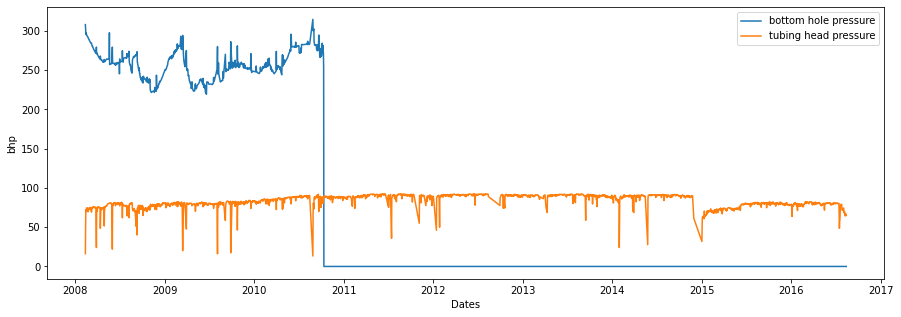

In [18]:
plt.figure(figsize=(15,5))
sns.lineplot(Volve_data['Dates'],Volve_data['bhp'], label ='bottom hole pressure')
sns.lineplot(Volve_data['Dates'],Volve_data['thp'],label ='tubing head pressure')
plt.legend()

In [19]:
#Dropping the nan values
Volve_data.dropna(inplace =True)

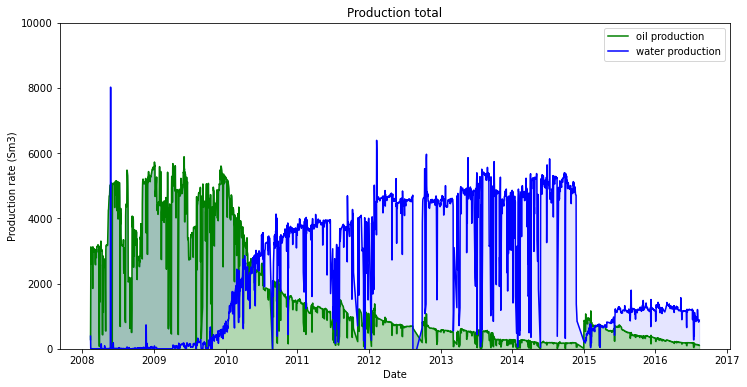

In [20]:
plt.subplots(figsize=(12,6))
ax = sns.lineplot(Volve_data['Dates'], Volve_data['oil_vol'], color='green')
ax = sns.lineplot(Volve_data['Dates'], Volve_data['water_vol'], color='blue')
ax.fill_between(Volve_data['Dates'], Volve_data['oil_vol'], alpha=0.3, color='green')
ax.fill_between(Volve_data['Dates'], Volve_data['oil_vol'],Volve_data['water_vol'], alpha=0.1, color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Production rate (Sm3)')
ax.set_ylim(0,10000)
ax.set_title('Production total')
ax.legend(labels=['oil production', 'water production'])
plt.show()

The well started production in 2008, the well had it peak oil production somewhere in late 2008 to late 2009. The peak oil production rate was approximately 6000 sm3/day. The was early water production from the well. The well recorded a peak water production rate of approximately 6000 sm3/day.

In [21]:
Volve_data[Volve_data['water_vol']<0].index

Int64Index([1982, 3502], dtype='int64')

In [22]:
#If we analysze the water volume values, the data contains negative values 
# Volve_data.loc[1515: 1525]
# Volve_data.loc[60:80]

#Let apply the abs function to convert these values to positive values
Volve_data['water_vol']= abs(Volve_data['water_vol'])

In [23]:
# Creating watercut and gor columns in the data
Volve_data['gor']=Volve_data['gas_vol']/Volve_data['oil_vol']
Volve_data['water_cut']=Volve_data['water_vol']/(Volve_data['oil_vol'] +Volve_data['water_vol'])

In [24]:
#Volve_data['gor'].describe()
#the output showed inf values for gor.this is quite understandable since some rows have no gas and oil produced.
#lets replace the inf values with zero gor values.

Volve_data.replace(np.inf,0,inplace=True)

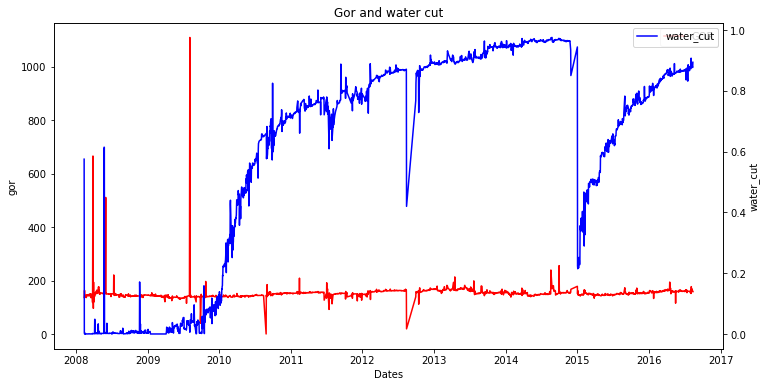

In [25]:
#Let's plot water_cut and gor

plt.subplots(figsize=(12,6))
ax = sns.lineplot(Volve_data['Dates'], Volve_data['gor'], color='red',label = 'GOR')
ax2 = plt.twinx()
ax2 =sns.lineplot(Volve_data['Dates'], Volve_data['water_cut'], color='blue',label = 'water_cut')
ax.set_title('Gor and water cut')
ax2.legend()
ax.legend()
plt.show()

In [26]:
#volve_data = Volve_data.set_index(Volve_data['Dates'])
#volve_data[['choke size percentage','bhp','dp_tubing','thp','oil_vol']].plot(subplots = True, figsize = (10,5))

In [27]:
Volve_data.isnull().sum()

Dates                    0
on_stream_hrs            0
bhp                      0
bht                      0
dp_tubing                0
choke_size               0
tht                      0
thp                      0
choke size percentage    0
oil_vol                  0
gas_vol                  0
water_vol                0
gor                      1
water_cut                2
dtype: int64

In [28]:
#The data still contain a few nan values
Volve_data.dropna(inplace =True)
Volve_data.describe()

,on_stream_hrs,bhp,bht,dp_tubing,choke_size,tht,thp,choke size percentage,oil_vol,gas_vol,water_vol,gor,water_cut
count,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000
mean,22.987840,83.871352,34.765463,85.148622,73.346476,47.565510,83.797544,17.438028,1606.147322,234132.196587,2414.895046,152.182309,0.596668
std,3.628678,120.915713,49.964055,71.356814,26.122269,20.174683,8.027552,18.594500,1661.995289,234578.093358,1919.291054,24.003564,0.354808
min,0.250000,0.000000,0.000000,25.842671,0.600000,0.000000,16.056460,0.255408,1.300000,183.170000,0.000000,19.153454,0.000000
25%,24.000000,0.000000,0.000000,32.552558,51.024953,32.550895,79.449524,4.094214,358.192500,54725.645000,562.832500,144.535135,0.273330
50%,24.000000,0.000000,0.000000,38.583749,74.704686,38.540336,85.856848,7.363654,739.815000,118445.140000,2144.285000,151.303612,0.755240
75%,24.000000,242.896132,106.162539,172.061691,100.000000,58.764222,90.325377,26.396212,2650.395000,374303.105000,4481.555000,157.522397,0.877654
max,25.000000,308.055940,107.507552,259.087354,100.000000,120.888576,92.458642,106.035140,5888.690000,835981.330000,8019.740000,1110.185309,0.975272


In [29]:
#Checking for correlations between features
#Volve_data.corr()

In [30]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = Volve_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,on_stream_hrs,bhp,bht,dp_tubing,choke_size,tht,thp,choke size percentage,oil_vol,gas_vol,water_vol,gor,water_cut
on_stream_hrs,1.000000,-0.000427,0.007829,0.000615,0.354390,-0.078009,0.268470,-0.095271,0.163874,0.169294,0.193544,-0.166654,-0.008555
bhp,-0.000427,1.000000,0.995899,0.987681,-0.513701,0.820182,-0.338106,0.799780,0.849345,0.846615,-0.588199,-0.195420,-0.862329
bht,0.007829,0.995899,1.000000,0.984379,-0.498942,0.802016,-0.336004,0.778959,0.873279,0.868940,-0.599421,-0.206832,-0.876425
dp_tubing,0.000615,0.987681,0.984379,1.000000,-0.544450,0.799667,-0.318314,0.774316,0.845479,0.842118,-0.559456,-0.211606,-0.840074
choke_size,0.354390,-0.513701,-0.498942,-0.544450,1.000000,-0.747937,0.570080,-0.754181,-0.408260,-0.410768,0.604137,0.105444,0.606361
tht,-0.078009,0.820182,0.802016,0.799667,-0.747937,1.000000,-0.497061,0.989906,0.707399,0.713143,-0.601505,-0.140962,-0.866250
thp,0.268470,-0.338106,-0.336004,-0.318314,0.570080,-0.497061,1.000000,-0.555623,-0.218656,-0.212425,0.761685,-0.082863,0.535214
choke size percentage,-0.095271,0.799780,0.778959,0.774316,-0.754181,0.989906,-0.555623,1.000000,0.666954,0.673123,-0.622531,-0.097054,-0.855397
oil_vol,0.163874,0.849345,0.873279,0.845479,-0.408260,0.707399,-0.218656,0.666954,1.000000,0.998550,-0.572157,-0.258152,-0.884252
gas_vol,0.169294,0.846615,0.868940,0.842118,-0.410768,0.713143,-0.212425,0.673123,0.998550,1.000000,-0.563440,-0.245545,-0.881587


In [31]:
#import statsmodels.tools as sm
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#from statsmodels.tools.tools import add_constant
#Volve = Volve_data[['on_stream_hrs','dp_tubing', 'choke_size', 'thp','choke size percentage', 'water_vol', 'gor','oil_vol']]
#X1 = add_constant(Volve)

In [32]:
#VIF = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index =X1.columns)
#print('VIF')
#display(VIF)

In [33]:
#The function removes outliers that are 3 std below and above the mean
from scipy import stats
volve_data = Volve_data.drop('Dates',axis=1)
volve_data = volve_data[(np.abs(stats.zscore(volve_data))< 3).all(axis = 1)]
volve_data

,on_stream_hrs,bhp,bht,dp_tubing,choke_size,tht,thp,choke size percentage,oil_vol,gas_vol,water_vol,gor,water_cut
1937,24.00000,282.386067,105.904612,176.456565,31.159112,105.929502,73.138439,71.562221,2996.83,427791.00,1.77,142.747837,0.000590
1938,24.00000,281.522258,105.906405,176.232612,31.305013,105.289646,73.336446,71.062263,3021.40,440679.00,0.60,145.852585,0.000199
1939,24.00000,280.894439,105.907515,176.083681,31.370030,104.810758,73.970566,71.283406,3010.40,450972.00,0.60,149.804677,0.000199
1940,23.77500,281.084913,105.895058,176.032042,29.858670,105.052870,73.889619,71.868016,2794.44,418887.00,0.56,149.900159,0.000200
1941,24.00000,279.488200,105.916192,176.046879,31.642545,103.441321,75.308658,70.450699,3058.89,458524.00,0.61,149.898820,0.000199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926,24.00000,0.000000,0.000000,32.411694,30.251105,32.411694,65.401424,8.517839,119.63,19170.05,863.73,160.244504,0.878346
4927,23.75000,0.000000,0.000000,32.787385,29.345523,32.787385,66.198632,8.982105,110.61,18060.66,817.25,163.282343,0.880790
4928,24.00000,0.000000,0.000000,32.752006,30.232033,32.752006,67.101547,8.870006,118.12,19262.51,850.79,163.075770,0.878090
4929,24.00000,0.000000,0.000000,32.819491,30.216773,32.819491,66.378396,8.909327,120.41,19069.01,854.05,158.367328,0.876434


## Linear regression model

In [34]:
#creating a list of fesatures to be used to train the model
output_col =['on_stream_hrs','dp_tubing', 'choke_size', 'thp','choke size percentage', 'water_vol', 'gor','water_cut']

In [35]:
# reseting row indexes
volve_data =Volve_data.reset_index()


#stores row and column lengths
a,b =volve_data.shape
c = round(a*0.7)

In [36]:
#Let's divide the data into train and test data
train = volve_data.loc[:c]
test = volve_data.loc[c+1:]

In [37]:
#training data
X = train[output_col]
Y = train['oil_vol']

In [38]:
#import ml libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [39]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [40]:
#using pipeline to summarize data normalization and the regression process
pipe =Pipeline([
    ('scl',MinMaxScaler(feature_range=(0,1))),
    ('reg',LinearRegression())
])

In [41]:
#fit linear model to train data
pipe.fit(x_train,y_train)

Pipeline(steps=[('scl', MinMaxScaler()), ('reg', LinearRegression())])

In [42]:
#predict test data
y_pred_test = pipe.predict(x_test)



y_pred_train = pipe.predict(x_train)

## Model Performance

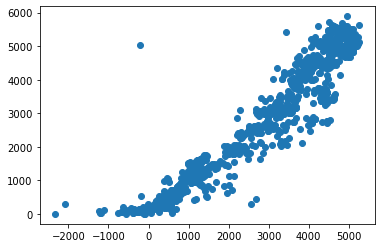

In [43]:
plt.scatter(y_pred_train,y_train)

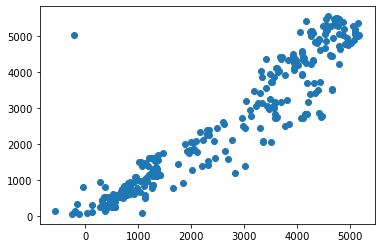

In [44]:
plt.scatter(y_pred_test,y_test)

In [45]:
train_score =pipe.score(x_train,y_train)

print('Training accuracy is {}'.format(train_score))

Training accuracy is 0.9271598426155813


In [46]:
test_score = r2_score(y_test,y_pred_test)


print('Testing accuracy is {}'.format(test_score))

Testing accuracy is 0.9005983735865541


In [47]:
volve_data['pred_oil'] = pipe.predict(Volve_data[output_col])

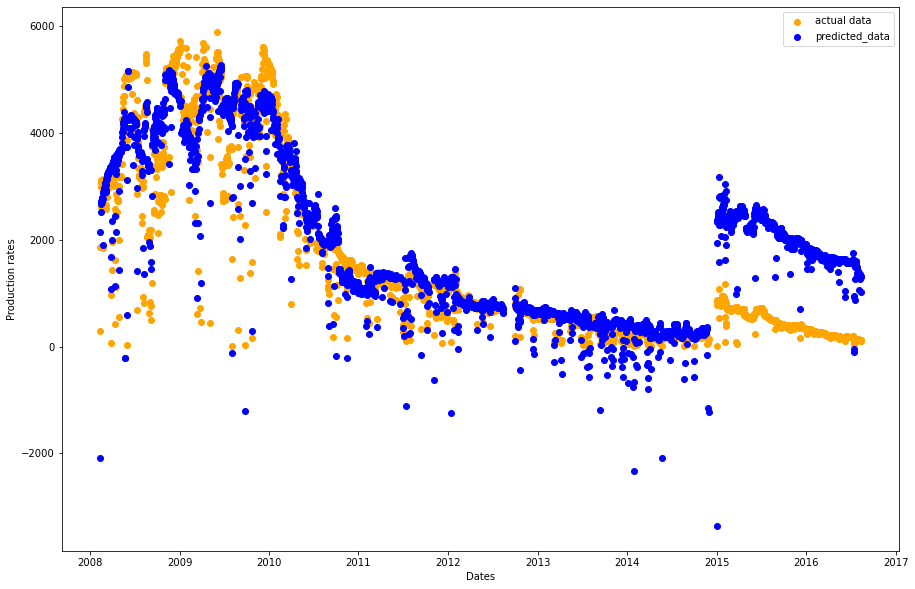

In [49]:
#plots predicted data over actual data
plt.figure(figsize=(15,10))
plt.scatter(volve_data['Dates'],volve_data['oil_vol'],color = 'orange',label ='actual data')
plt.scatter(volve_data['Dates'],volve_data['pred_oil'],color = 'blue',label='predicted_data')
plt.xlabel('Dates')
plt.ylabel('Production rates')
plt.legend()